# Introduction to the MetObs-toolkit

In this introduction, you will learn the principal components and methods in the MetObs-toolkit. Let's start by importing it.

Since this package is under development, it is often relevant to know the precise version of the toolkit.

In [1]:
import metobs_toolkit

#Print out the version of the toolkit
print(metobs_toolkit.__version__)

0.4.0a


## The Dataset class

The ``Dataset`` class is for most applications the most important class. It holds all your stations and it's data. Thus a ``Dataset`` is in principal a collection of stations.

Since raw data files often include observations from multiple stations, we import our raw data always directly into a ``Dataset``. We use the ``Dataset.import_data_from_file()`` method, to import the raw data into a Dataset. 

A key component for importing raw data, is a description of what your data represents and how it is formatted. This is done by providing a **template file**, that describes how your raw data is structured. 



### Importing your raw data

As an example we will import a demo file of raw observations. In order to do that we need to :

* Create a template file for our raw data file. The ``build_template_prompt()`` function will guide you in this process. It will ask questions, once you answerd them a template file is created. It will also propose some code that you use to import your data
* Create a ``Dataset`` instance 
* Add the raw data into the ``Dataset``.

In [2]:
# Specify the path to your raw data file (we use the demo file as example)
path_to_datafile=metobs_toolkit.demo_datafile

# We will also use a metadata file
path_to_metadatafile=metobs_toolkit.demo_metadatafile

In [3]:
%%script true

#Create a template for these data files
metobs_toolkit.build_template_prompt()

In [4]:
#specify the path to the templatefile that was created
path_to_templatefile=metobs_toolkit.demo_template #demo file as example!!

Now that we have the datafiles and the templatefile, we create an empty ``Dataset``, and import the data into it.

In [5]:
dataset = metobs_toolkit.Dataset() #Create a new dataset object

#Load the data
dataset.import_data_from_file(
                    template_file=path_to_templatefile, #The template file
                    input_data_file=path_to_datafile, #The data file
                    input_metadata_file=path_to_metadatafile, #The metadata file
                    )

Luchtdruk is present in the datafile, but not found in the template! This column will be ignored.


Neerslagintensiteit is present in the datafile, but not found in the template! This column will be ignored.


Neerslagsom is present in the datafile, but not found in the template! This column will be ignored.


Rukwind is present in the datafile, but not found in the template! This column will be ignored.


Luchtdruk_Zeeniveau is present in the datafile, but not found in the template! This column will be ignored.


Globe Temperatuur is present in the datafile, but not found in the template! This column will be ignored.


The following columns are present in the data file, but not in the template! They are skipped!
 ['Neerslagintensiteit', 'Neerslagsom', 'Luchtdruk_Zeeniveau', 'Rukwind', 'Luchtdruk', 'Globe Temperatuur']


The following columns are found in the metadata, but not in the template and are therefore ignored: 
['stad', 'Network', 'benaming', 'sponsor']


As can be seen in the printed logs, there is a lot going on when importing the data. That is because tests are applied on your data to check for gaps, and mismatches between data and metadata. 

We can now inspect the ´dataset´ further.

## The attributes

The attributes are holding the data of the dataset. Here we present some attributes that can be usefull to inspect.



<div class="alert alert-block alert-info">
All classes in the MetObs-toolkit have a ``get_info()`` methods that prints out an overview of its content.
</div>

* ``Dataset.obstypes`` : A collection of ``Obstypes`` that are known. These observationtypes describe a measurable quantity, and its corresponding units.

In [6]:
dataset.obstypes

{'temp': Obstype instance of temp,
 'humidity': Obstype instance of humidity,
 'radiation_temp': Obstype instance of radiation_temp,
 'pressure': Obstype instance of pressure,
 'pressure_at_sea_level': Obstype instance of pressure_at_sea_level,
 'precip': Obstype instance of precip,
 'precip_sum': Obstype instance of precip_sum,
 'wind_speed': Obstype instance of wind_speed,
 'wind_gust': Obstype instance of wind_gust,
 'wind_direction': Obstype instance of wind_direction}

In [7]:
#Note! The known obstypes are NOT the obstypes for which there are observations.
#To get the obstypes for which there are observations, use:
dataset.present_observations

['humidity', 'temp', 'wind_direction', 'wind_speed']

* ``Dataset.template``: A template class, that is automatically set up by using the template file. This is only used when data is imported from a file. It has no further use.

In [8]:
template = dataset.template

template.get_info() # Prints out how the template maps raw data

------ Data obstypes map ---------
 * temp            <---> Temperatuur    
     (raw data in degC)
     (description: 2mT passive)

 * humidity        <---> Vochtigheid    
     (raw data in percent)
     (description: 2m relative humidity passive)

 * wind_speed      <---> Windsnelheid   
     (raw data in km/h)
     (description: Average 2m  10-min windspeed)

 * wind_direction  <---> Windrichting   
     (raw data in degrees)
     (description: Average 2m  10-min windspeed,  ...)


------ Data extra mapping info ---------
 * name column (data) <---> Vlinder

------ Data timestamp map ---------
 * datetimecolumn  <---> None           
 * time_column     <---> Tijd (UTC)     
 * date_column     <---> Datum          
 * fmt             <---> %Y-%m-%d %H:%M:%S
 * Timezone        <---> UTC

------ Metadata map ---------
 * name            <---> Vlinder        
 * lat             <---> lat            
 * lon             <---> lon            
 * school          <---> school         


* ``dataset.df``: A pandas DataFrame holding all the observation records.

In [9]:
dataset.df

value label
datetime                  obstype    name                      
2022-09-01 00:00:00+00:00 humidity   vlinder01  65.000000    ok
                                     vlinder02  62.000000    ok
                                     vlinder03  65.000000    ok
                                     vlinder04  66.000000    ok
                                     vlinder05  61.000000    ok
...                                                   ...   ...
2022-09-15 23:55:00+00:00 wind_speed vlinder24   0.000000    ok
                                     vlinder25   1.972222    ok
                                     vlinder26   0.027778    ok
                                     vlinder27   0.000000    ok
                                     vlinder28   0.000000    ok

[483840 rows x 2 columns]

* ``dataset.metadf``: A pandas DataFrame holding all the metadata of the stations.

In [10]:
dataset.metadf

,lat,lon,school,geometry
name,,,,
vlinder01,50.980438,3.815763,UGent,POINT (3.81576 50.98044)
vlinder02,51.022379,3.709695,UGent,POINT (3.7097 51.02238)
vlinder03,51.324583,4.952109,Heilig Graf,POINT (4.95211 51.32458)
vlinder04,51.335522,4.934732,Heilig Graf,POINT (4.93473 51.33552)
vlinder05,51.052655,3.675183,Sint-Barbara,POINT (3.67518 51.05266)
vlinder06,51.027100,4.516300,BimSem,POINT (4.5163 51.0271)
vlinder07,51.030889,4.478445,PTS,POINT (4.47844 51.03089)
vlinder08,51.028130,4.477398,TSM,POINT (4.4774 51.02813)
vlinder09,50.927167,4.075722,SMI,POINT (4.07572 50.92717)


## Station class

The stationclass is a representatio of a station. A station holds the following:

* ``Station.sensordata``: Timeseries of an observation type. A station can hold multiple sensordata, one for each sensor. 
* ``Station.site``: Each station has a ´Site´ attribute, that holds the information on the location of the station. Metadata related to the station is also stored here. 
* ``Station.modeldata``: In addition to the observations, modeldata timeseries representing the station can be stored. In pracktice, if one would download ERA5 data (using the MetObs-toolkit), the timeseries are stored as modeldata in the Station.


To select a station, one can use the *name* of the station, which is assumed to be unique for each station.


<div class="alert alert-block alert-info">
All the methods and attributes that are present in the ``Dataset`` are also applicable on the ``Station``! Thus if your script works on Dataset-level, it also works on station-level. 


Only the ``Dataset.sync_records()``, ``Dataset.buddy_check()``, and trivial Dataset-only methods (i.g. ``Dataset.get_station()``) are not defined for Stations.
</div>

In [11]:
#Select a station
your_station = dataset.get_station('vlinder02')

#Print out some details
your_station.get_info()

Station vlinder02 with: 

 --- Sensor Data ---
wind_speed records of vlinder02:
  * from 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00
  * assumed frequency: 0 days 00:05:00
  * Number of records: 4320
    - of which outliers: 0
  * Number of gaps: 2
wind_direction records of vlinder02:
  * from 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00
  * assumed frequency: 0 days 00:05:00
  * Number of records: 4320
    - of which outliers: 0
  * Number of gaps: 2
temp records of vlinder02:
  * from 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00
  * assumed frequency: 0 days 00:05:00
  * Number of records: 4320
    - of which outliers: 0
  * Number of gaps: 2
humidity records of vlinder02:
  * from 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00
  * assumed frequency: 0 days 00:05:00
  * Number of records: 4320
    - of which outliers: 0
  * Number of gaps: 2

--- Site ---
Site of vlinder02:
 -- metadata from file --
  * Coordinates (51.022379, 3.709695) (lat

In [12]:
# Inspecting the attributes of the station

#Print out info on the Site of the station:
your_station.site.get_info()

Site of vlinder02:
 -- metadata from file --
  * Coordinates (51.022379, 3.709695) (latitude, longitude)
  Extra metadata from the metadatafile:
    * school: UGent
 -- data extracted from GEE --



In [13]:
# All observational data is stored as SensorData

print(your_station.sensordata)

# More convenient is to use the pandas dataframe representations,
# similar as with the Dataset

your_station.df

{'wind_speed': Sensordata instance of wind_speed -> vlinder02, 'wind_direction': Sensordata instance of wind_direction -> vlinder02, 'temp': Sensordata instance of temp -> vlinder02, 'humidity': Sensordata instance of humidity -> vlinder02}


value label
datetime                  obstype                         
2022-09-01 00:00:00+00:00 humidity         62.000000    ok
                          temp             19.400000    ok
                          wind_direction   25.000000    ok
                          wind_speed        0.194444    ok
2022-09-01 00:05:00+00:00 humidity         62.000000    ok
...                                              ...   ...
2022-09-15 23:50:00+00:00 wind_speed        0.000000    ok
2022-09-15 23:55:00+00:00 humidity         83.000000    ok
                          temp             12.900000    ok
                          wind_direction  295.000000    ok
                          wind_speed        0.000000    ok

[17280 rows x 2 columns]

In [14]:
#Or the metadata for this singel station
your_station.metadf

,lat,lon,school,geometry
name,,,,
vlinder02,51.022379,3.709695,UGent,POINT (3.7097 51.02238)


## Plotting timeseries

Plotting the timeseries can be simply done by using the ``make_plot()`` method, on a ``Dataset`` or a ``Station``.

<Axes: title={'center': 'temp data.'}, xlabel='Timestamps (in UTC)', ylabel='temp (degree_Celsius)'>

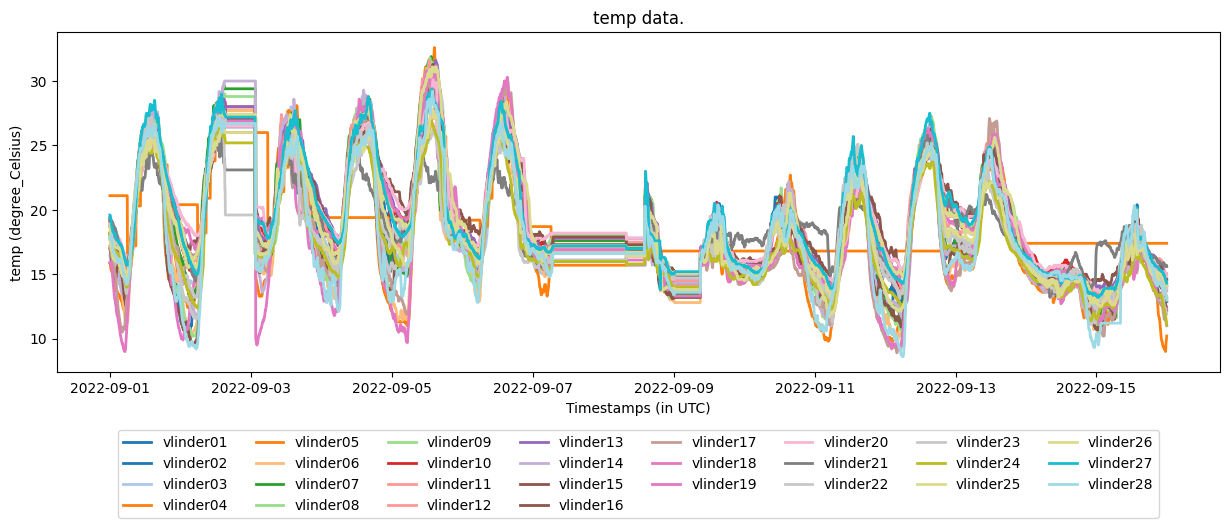

In [15]:
dataset.make_plot(obstype='temp', #Which observation type to plot. (See dataset.present_observations)
                  colorby='station', #if 'station', each station will be a different color
                  show_outliers=True,
                  show_gaps=True)

<Axes: title={'center': 'humidity data for station vlinder02'}, xlabel='Timestamps (in UTC)', ylabel='humidity (percent)'>

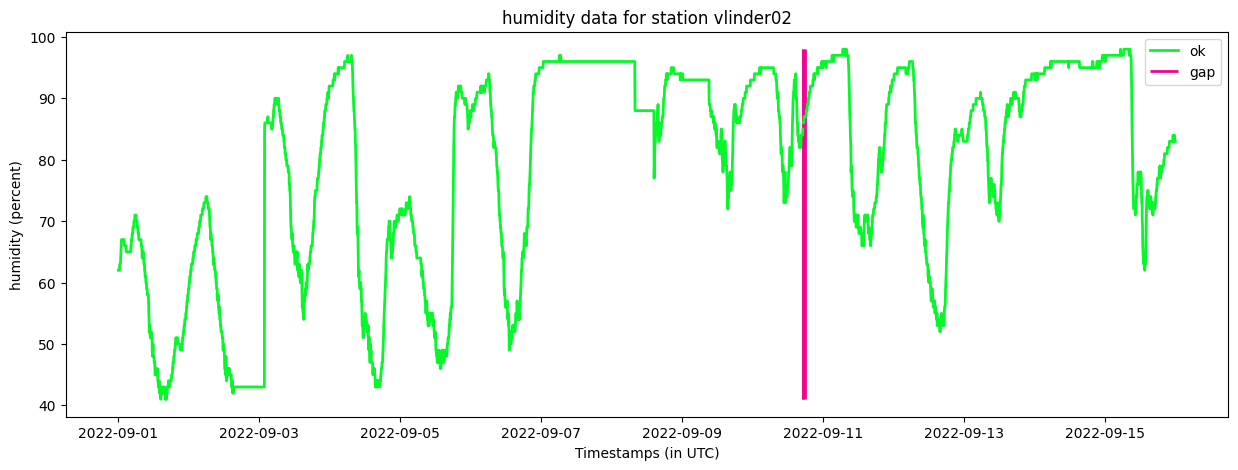

In [16]:
#We can also plot a single station
your_station.make_plot(obstype='humidity',
                       colorby='label') #If 'label', the colors are based on the status/label of an observation.

## Common usecases

Here a collection of common usecases.

### Resampling time resolution

It is common to change or alter the time resolution of your observations. This is often applied when:

* the data amount is to big, and the present time resolution is not required for the analysis.
* sensor do not have the same time resolution. (i.g. temperature is measured every 5 minutes, but precipitation is measured each hour.)
* Observations are not sychronized over multiple stations. This is a special case of resampling, since there is also a synchronization required.

It is recommendad to set the target time resolution, in the beginning of your pipeline! 

In the MetObs-toolkit you can resample by using the ``resample()`` method on a ``Dataset`` or ``Station``. By doing so, the toolkit will construct a set of target timestamps (in the new resolution), and will map the raw timestamps to the new target timestamps. There is no interpolation applied! 

In order to construct the mapping of the old timestamps to the target timestamps, a tollerance is used. The neirest timestamp is tested if it is within the tolerance of the target timestamp. If this test is not succecsfull, no record could be assigned to the target timestamp and thus a gap is created. Thus by increasing the *shift_tolerance*, the resampling method will have more mapped timestamps thus less gaps but at the cost of less accurate timestamps.

In [17]:
hourly_dataset = metobs_toolkit.Dataset()
#Load the data (raw data has 5 min resolution)
hourly_dataset.import_data_from_file(
                    template_file=path_to_templatefile, #The template file
                    input_data_file=path_to_datafile, #The data file
                    input_metadata_file=path_to_metadatafile, #The metadata file
                    )
#Resample to 1 hour resolution
hourly_dataset.resample(target_freq='1h', #Target frequency is set to 1 hour
                        target_obstype=None, #if None, all present observations are resampled
                        shift_tolerance='4min', #The maximum shift allowd for a timestamp
                        origin_simplify_tolerance='3min') # The maximum shift for the origin, to get a simplified origin

# You can verify that the resolution is hourl by inspecing the df attribute
hourly_dataset.df.index

 ['Neerslagintensiteit', 'Neerslagsom', 'Luchtdruk_Zeeniveau', 'Rukwind', 'Luchtdruk', 'Globe Temperatuur']


['stad', 'Network', 'benaming', 'sponsor']


MultiIndex([('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder01'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder02'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder03'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder04'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder05'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder06'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder07'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder08'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder09'),
            ('2022-09-01 00:00:00+00:00',   'humidity', 'vlinder10'),
            ...
            ('2022-09-15 23:00:00+00:00', 'wind_speed', 'vlinder19'),
            ('2022-09-15 23:00:00+00:00', 'wind_speed', 'vlinder20'),
            ('2022-09-15 23:00:00+00:00', 'wind_speed', 'vlinder21'),
            ('2022-09-15 23:00:00+00:00', 'wind_speed', 'vlinder22'),
    

### Dataframe of one observationtype

The ``Dataset.df`` and ``Station.df`` returns a pandas dataframe with a so calld Multi-Index. That is because the combination of [´timestamp´, ´observationtype´, 'stationname´] defines an observation, thus the use of the Multi-Index. 

We are aware that working with Multi-Indexed dataframes can be challenging, thus an example on how to convert a multiindex dataframe to a regular-indexed dataframe. 

Be aware that removing (or reducing) the Multi-Index, is always a subsetting or approximation.

In [18]:
#Subset to only temperatures (=subsetting)

temperatures = dataset.df.xs(key='temp', 
                             level='obstype', #the level of the index ('datetime', 'name' or 'obstype')
                             drop_level=True)

#You can see that the index now only has 2-levels:
temperatures

value label
datetime                  name                      
2022-09-01 00:00:00+00:00 vlinder01  18.799999    ok
                          vlinder02  19.400000    ok
                          vlinder03  17.000000    ok
                          vlinder04  15.900000    ok
                          vlinder05  21.100000    ok
...                                        ...   ...
2022-09-15 23:55:00+00:00 vlinder24  11.100000    ok
                          vlinder25  14.100000    ok
                          vlinder26  13.300000    ok
                          vlinder27  14.300000    ok
                          vlinder28  13.000000    ok

[120960 rows x 2 columns]

In [19]:
#If we assume that all the temperature observations over all the stations have the same
#set of timestamps (typical after resampling! ), we can create a dataframe with all stations represented by columns.

temperatures_wide = (dataset.df
                    #first subset to temperatures
                    .xs(key='temp', 
                            level='obstype', #the level of the index ('datetime', 'name' or 'obstype')
                            drop_level=True)
                    #Convert a index level to columns (unstacking)
                    .unstack(level='name'))
temperatures_wide
                    

value                                  \
name                       vlinder01  vlinder02  vlinder03 vlinder04   
datetime                                                               
2022-09-01 00:00:00+00:00  18.799999  19.400000  17.000000      15.9   
2022-09-01 00:05:00+00:00  18.799999  19.400000  16.900000      15.8   
2022-09-01 00:10:00+00:00  18.799999  19.299999  16.799999      15.8   
2022-09-01 00:15:00+00:00  18.700001  19.200001  16.700001      15.6   
2022-09-01 00:20:00+00:00  18.700001  19.200001  16.600000      15.4   
...                              ...        ...        ...       ...   
2022-09-15 23:35:00+00:00  13.200000  13.300000  12.200000       9.1   
2022-09-15 23:40:00+00:00  13.100000  13.200000  12.200000       9.6   
2022-09-15 23:45:00+00:00  13.000000  13.100000  12.200000       9.8   
2022-09-15 23:50:00+00:00  12.900000  13.000000  12.300000      10.0   
2022-09-15 23:55:00+00:00  12.900000  12.900000  12.400000      10.2   

                                                                     \
name                      vlinder05  vlinder06 vlinder07  vlinder08   
datetime                                                              
2022-09-01 00:00:00+00:00      21.1  17.700001      18.1  19.200001   
2022-09-01 00:05:00+00:00      21.1  17.700001      18.1  19.100000   
2022-09-01 00:10:00+00:00      21.1  17.600000      18.0  19.100000   
2022-09-01 00:15:00+00:00      21.1  17.500000      18.0  19.000000   
2022-09-01 00:20:00+00:00      21.1  17.500000      18.1  19.000000   
...                             ...        ...       ...        ...   
2022-09-15 23:35:00+00:00      17.4  13.200000      13.4  14.400000   
2022-09-15 23:40:00+00:00      17.4  13.100000      13.4  14.300000   
2022-09-15 23:45:00+00:00      17.4  13.000000      13.3  14.300000   
2022-09-15 23:50:00+00:00      17.4  13.100000      13.3  14.200000   
2022-09-15 23:55:00+00:00      17.4  13.100000      13.2  14.200000   

                                                 ...     label            \
name                       vlinder09  vlinder10  ... vlinder19 vlinder20   
datetime                                         ...                       
2022-09-01 00:00:00+00:00  18.000000  19.100000  ...        ok        ok   
2022-09-01 00:05:00+00:00  18.000000  19.000000  ...        ok        ok   
2022-09-01 00:10:00+00:00  17.900000  18.900000  ...        ok        ok   
2022-09-01 00:15:00+00:00  17.799999  18.900000  ...        ok        ok   
2022-09-01 00:20:00+00:00  17.700001  18.799999  ...        ok        ok   
...                              ...        ...  ...       ...       ...   
2022-09-15 23:35:00+00:00  13.200000  14.300000  ...        ok        ok   
2022-09-15 23:40:00+00:00  13.100000  14.200000  ...        ok        ok   
2022-09-15 23:45:00+00:00  13.000000  14.200000  ...        ok        ok   
2022-09-15 23:50:00+00:00  13.000000  14.200000  ...        ok        ok   
2022-09-15 23:55:00+00:00  13.000000  14.100000  ...        ok        ok   

                                                                             \
name                      vlinder21 vlinder22 vlinder23 vlinder24 vlinder25   
datetime                                                                      
2022-09-01 00:00:00+00:00        ok        ok        ok        ok        ok   
2022-09-01 00:05:00+00:00        ok        ok        ok        ok        ok   
2022-09-01 00:10:00+00:00        ok        ok        ok        ok        ok   
2022-09-01 00:15:00+00:00        ok        ok        ok        ok        ok   
2022-09-01 00:20:00+00:00        ok        ok        ok        ok        ok   
...                             ...       ...       ...       ...       ...   
2022-09-15 23:35:00+00:00        ok        ok        ok        ok        ok   
2022-09-15 23:40:00+00:00        ok        ok        ok        ok        ok   
2022-09-15 23:45:00+00:00        ok        ok        ok        ok        ok   
2022-09-15 23:

In [20]:
#if you are only interested in the value, you can select them:
temperatures_wide['value']

name,vlinder01,vlinder02,vlinder03,vlinder04,vlinder05,vlinder06,vlinder07,vlinder08,vlinder09,vlinder10,...,vlinder19,vlinder20,vlinder21,vlinder22,vlinder23,vlinder24,vlinder25,vlinder26,vlinder27,vlinder28
datetime,,,,,,,,,,,,,,,,,,,,,
2022-09-01 00:00:00+00:00,18.799999,19.400000,17.000000,15.9,21.1,17.700001,18.1,19.200001,18.000000,19.100000,...,18.700001,19.400000,19.299999,18.799999,18.0,18.200001,18.900000,17.900000,19.600000,17.799999
2022-09-01 00:05:00+00:00,18.799999,19.400000,16.900000,15.8,21.1,17.700001,18.1,19.100000,18.000000,19.000000,...,18.600000,19.400000,19.299999,18.799999,18.0,18.200001,18.500000,17.700001,19.600000,17.799999
2022-09-01 00:10:00+00:00,18.799999,19.299999,16.799999,15.8,21.1,17.600000,18.0,19.100000,17.900000,18.900000,...,18.600000,19.299999,19.200001,18.700001,18.0,18.100000,18.299999,17.500000,19.500000,17.700001
2022-09-01 00:15:00+00:00,18.700001,19.200001,16.700001,15.6,21.1,17.500000,18.0,19.000000,17.799999,18.900000,...,18.500000,19.299999,19.200001,18.600000,18.0,18.000000,18.200001,17.299999,19.400000,17.799999
2022-09-01 00:20:00+00:00,18.700001,19.200001,16.600000,15.4,21.1,17.500000,18.1,19.000000,17.700001,18.799999,...,18.500000,19.200001,19.200001,18.299999,18.0,17.900000,18.100000,17.100000,19.299999,17.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-15 23:35:00+00:00,13.200000,13.300000,12.200000,9.1,17.4,13.200000,13.4,14.400000,13.200000,14.300000,...,14.500000,15.000000,15.700000,12.100000,13.9,11.700000,14.200000,13.400000,14.500000,13.400000
2022-09-15 23:40:00+00:00,13.100000,13.200000,12.200000,9.6,17.4,13.100000,13.4,14.300000,13.100000,14.200000,...,14.500000,15.000000,15.700000,12.100000,13.9,11.600000,14.200000,13.400000,14.500000,13.300000
2022-09-15 23:45:00+00:00,13.000000,13.100000,12.200000,9.8,17.4,13.000000,13.3,14.300000,13.000000,14.200000,...,14.400000,14.900000,15.600000,12.100000,13.8,11.400000,14.200000,13.400000,14.400000,13.200000


### Quality control

For more details, refer to the [Quality Control Example Notebook](qc_example.ipynb).

### Extracting data from Google Earth Engine

For an introduction to extracting data for GEE, we refer to the **LINK** .

### Filling gaps

For an introduction to filling gaps, we refer to the **LINK** .

### Analysis 

For an introduction to analysing your dataset, we refer to the **LINK** .